In [6]:
#Import libraries

#System level library
import sys

#Library for scientific computation
import scipy

#Library for graph plotting (For visualization)
import matplotlib

#Library for analyzing tabular data
import pandas

#Library to perform vector/array operation
import numpy

#Library for machine learning algorithm
import sklearn

import seaborn

In [3]:
#Import necessary libraries

from pandas.plotting import scatter_matrix

from matplotlib import pyplot as plt

from sklearn import model_selection

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestClassifier

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
trainurl = '/Users/ayushjain/Downloads/Loan Prediction Project/clean data/cleaned_train_data.csv'
testurl = '/Users/ayushjain/Downloads/Loan Prediction Project/clean data/cleaned_test_data.csv'

traindata = pandas.read_csv(trainurl)
testdata = pandas.read_csv(testurl)

totaldata = pandas.concat([traindata, testdata], sort = False)

print(totaldata.isnull().sum())

#The only null entries present are the ones to compute. We have to ensemble the values using either Algorithm:
#1. Gradient Boosting
#2. Random Forest

#Let's first train the model using Gradient Boosting. Here the predictors are selected incrementally, leading to low bias and variance.
#In GBM, subsequent predictors learn from the mistakes of the previous predictors.


Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64


Percent of Loan Approved for Females:66.96428571428571%
Percent of Loan Approved for Males:69.32515337423312%


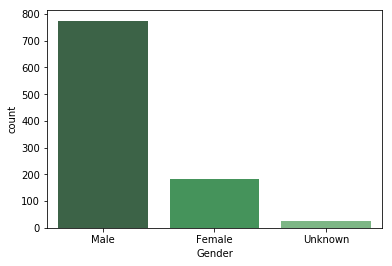

In [41]:
#Data Visualization - 1
#Use countplot from seaborn to get a view of distribution of each values for the attribute
#Let's first start with Gender attribute
seaborn.countplot(x = 'Gender', data = totaldata, palette="Greens_d")

#We see that there were a lot of Male applicants who applied for the Loan than Females.
#Let's now see what percent of male and female applicants who applied got Loan Approved.
var = totaldata.groupby(['Gender', 'Loan_Status']).size()

print('Percent of Loan Approved for Females:'+str((var[1]/(var[0]+var[1])*100))+'%')

print('Percent of Loan Approved for Males:'+str((var[3]/(var[2]+var[3])*100))+'%')

#We see that approval rate of Loan is more in Male than Female.

Percent of Loan Approved for Unmarried:62.91079812206573%
Percent of Loan Approved for Married:71.60804020100502%


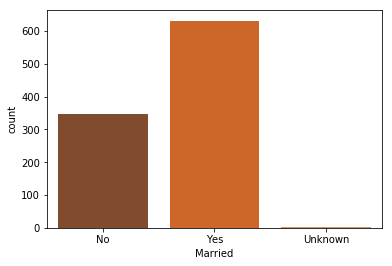

In [40]:
#Data Visualization - 2

#Let's plot countplot for Married attribute

seaborn.countplot(x = 'Married', data = totaldata, palette="Oranges_d")

#We see that the Married people applicant were more for Loan than Unmarried

#Let's see how much percent of Married and Unmarried applicants got Loan Approved

var = totaldata.groupby(['Married','Loan_Status']).size()

print('Percent of Loan Approved for Unmarried:'+str((var[1]/(var[0]+var[1])*100))+'%')

print('Percent of Loan Approved for Married:'+str((var[4]/(var[3]+var[4])*100))+'%')

#Here we see that approval rate of Loan is more for Married people than Unmarried.

Percent of Loan Approved for Graduate:70.83333333333334%
Percent of Loan Approved for Non-Graduate:61.19402985074627%


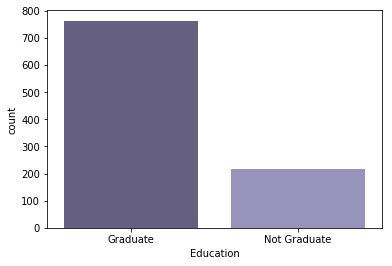

In [39]:
#Data Visualization - 3

#Now let's plot countplot of Education attribute

seaborn.countplot(x = 'Education', data = totaldata, palette="Purples_d")

#We see that Graduate student applicants were more than Non-Graduate people.

#Now see what percent of graduate & non-graduate student got loan approved.

var = totaldata.groupby(['Education','Loan_Status']).size()

print('Percent of Loan Approved for Graduate:'+str((var[1]/(var[0]+var[1])*100))+'%')

print('Percent of Loan Approved for Non-Graduate:'+str((var[3]/(var[3]+var[2])*100))+'%')

#Here we see that approval rate of Loan is more for Graduate people than Non-Graduate.

Percent of Loan Approved for applicants having Credit History:79.57894736842105%
Percent of Loan Approved for applicants not having Credit History:7.865168539325842%


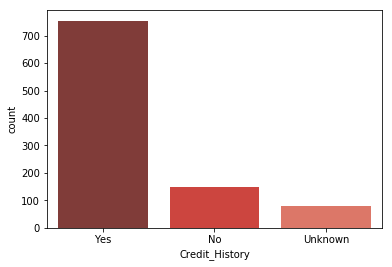

In [38]:
#Data Visualization - 4

#Now let's plot countplot of Credit_History attribute

seaborn.countplot(x = 'Credit_History', data = totaldata, palette="Reds_d")

#We see that people having Credit History were more than people who doesn't have Credit History.

#Now see what percent of applicants with credit history & not having credit history got loan approved.

var = totaldata.groupby(['Credit_History','Loan_Status']).size()

print('Percent of Loan Approved for applicants having Credit History:'+str((var[5]/(var[5]+var[4])*100))+'%')

print('Percent of Loan Approved for applicants not having Credit History:'+str((var[1]/(var[1]+var[0])*100))+'%')

#Here we see that approval rate of Loan is more for people having Credit history than people not having Credit History.


Percent of Loan Approved for People with no dependent:68.98550724637681%
Percent of Loan Approved for People with dependents:68.89763779527559%


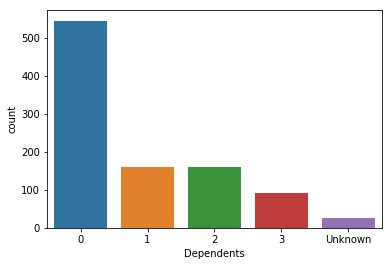

In [48]:
#Data Visualization - 5

#Now let's plot countplot of Dependents attribute

seaborn.countplot(x = 'Dependents', data = totaldata)

#We see that applicants with 0 dependents were more than people with 1 or more dependents.

#Now see what percent of people with dependents and no dependents got loan approved.

var = totaldata.groupby(['Dependents','Loan_Status']).size()

print('Percent of Loan Approved for People with no dependent:'+str((var[1]/(var[0]+var[1])*100))+'%')

print('Percent of Loan Approved for People with dependents:'+str(((var[3]+var[5]+var[7])/(var[3]+var[5]+var[7]+var[2]+var[4]+var[6])*100))+'%')

#Here we see that approval rate of Loan is more for people with no dependents than people with dependents.

In [ ]:
#Now we have gathered enough information about the data. We can now start with Model fitting using Ensemblers

#Now we are ready to predict the missing Loan values present in the test dataset.